,D,A,Sum
Q1,10,490,500
Q2,10,490,500
Sum,20,980,1000



	Fisher's Exact Test for Count Data

data:  M
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3698755 2.7036121
sample estimates:
odds ratio 
         1 



	2-sample test for equality of proportions without continuity
	correction

data:  M
X-squared = 0, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01735426  0.01735426
sample estimates:
prop 1 prop 2 
  0.02   0.02 


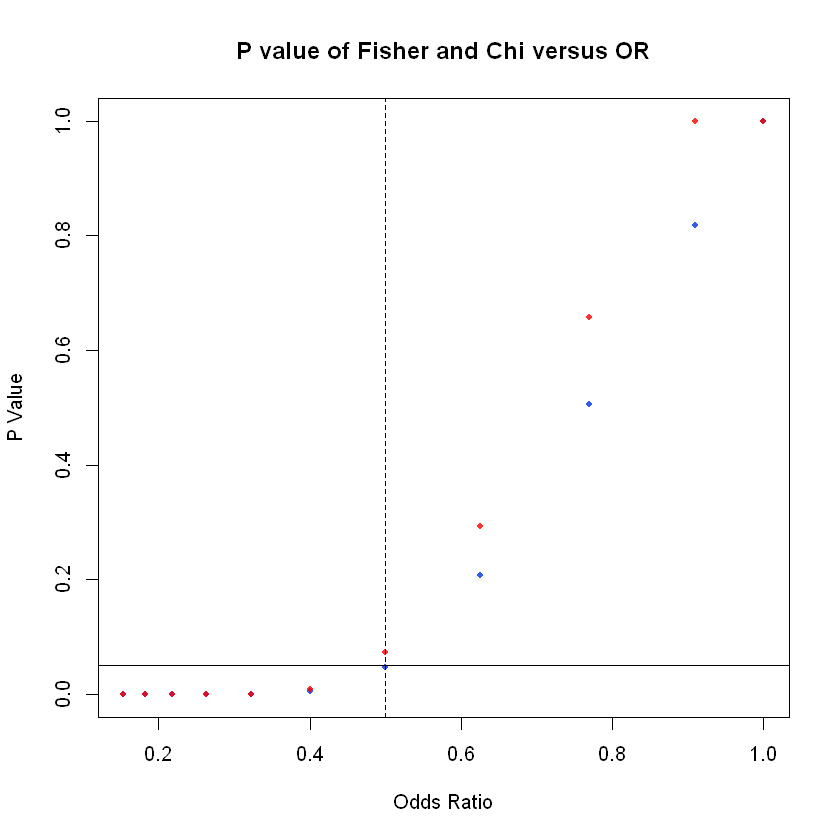

In [1]:
NQ1 = 500
NQ2 = 500
DQ1 = 10
DQ2 = 10
M = matrix(c(DQ1, DQ2, NQ1 - DQ1, NQ2 - DQ2),2, 
       dimnames = list(Quater = c("Q1", "Q2"),
                      Status = c("D", "A")))
addmargins(M)
fisher.test(M)
prop.test(M, correct = "F")

options( warn = -1 )
nsim = 10 
NQ1 = 100
NQ2 = 100
DQ1 = 10
DQ2 = 10
R = matrix(0,nsim+1, 3)
for(i in 0:nsim){
    DQ2 = i + DQ2
    R[i+1,1] <- DQ1 / DQ2
    M = matrix(c(DQ1, DQ2, NQ1 - DQ1, NQ2 - DQ2),2)
    R[i+1,2] <- fisher.test(M)$p
    R[i+1,3] <- prop.test(M, correct = FALSE)[[3]]
}
plot(R[,1],R[,3], pch = 21, col = rgb(red=0, green=0, blue=0, alpha=0), 
     cex = .7, bg = rgb(0,.2,.9,.8), 
     main = "P value of Fisher and Chi versus OR",
     xlab = "Odds Ratio", ylab = "P Value")

points(R[,1],R[,2], pch = 21, 
       col = rgb(red=0, green=0, blue=0, alpha=0), 
       cex = .7, bg = rgb(1,0,0,.8))
abline(v=0.5, lty=2)
abline(h=.05)